In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from pathlib import Path
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [4]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
# Determine the number of unique values in each column
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df.dropna()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [9]:
df.describe()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [11]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
# Dropped 'Education' column as it is not related 
df.drop(["education"],axis=1,inplace = True)
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
df.drop(["prevalentStroke"],axis=1,inplace = True)
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
prevalentHyp       0
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
TenYearCHD         0
dtype: int64

In [14]:
df.drop(["diabetes"],axis=1,inplace = True)
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
prevalentHyp       0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
TenYearCHD         0
dtype: int64

In [15]:
df.cigsPerDay.describe()

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [17]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
   intercept_scaling=1, max_iter=100, multi_class='warn', penalty='12',
   random_state=1, solver='lbfgs', tol=0.0001, warm_start=False)

LogisticRegression(multi_class='warn', penalty='12', random_state=1)

In [18]:
df.mean()


male               0.429212
age               49.584946
currentSmoker      0.494101
cigsPerDay         9.003089
BPMeds             0.029630
prevalentHyp       0.310524
totChol          236.721585
sysBP            132.352407
diaBP             82.893464
BMI               25.802008
heartRate         75.878924
glucose           81.966753
TenYearCHD         0.151958
dtype: float64

In [19]:
dist_df = df.TenYearCHD.value_counts().to_frame()
dist_df

,TenYearCHD
0,3594
1,644


In [20]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test, predictions)

NameError: name 'y_test' is not defined

Text(0.5, 1.0, 'Distribution of Heart Disease')

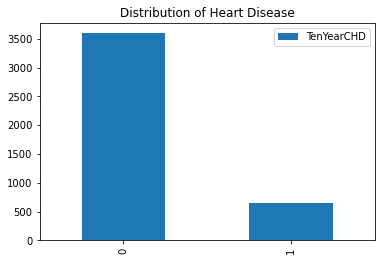

In [21]:
dist_df.plot.bar()
plt.title("Distribution of Heart Disease")


<AxesSubplot:title={'center':'Distribution of Heart Disease'}, ylabel='TenYearCHD'>

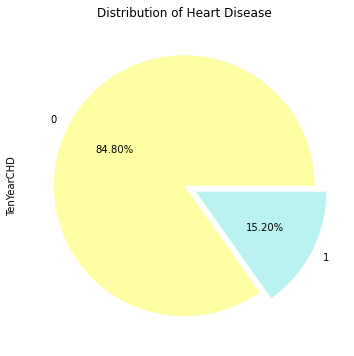

In [22]:
import seaborn as sns
plt.figure(figsize=(6,6))
plt.title("Distribution of Heart Disease")
df["TenYearCHD"].value_counts().plot(kind="pie",colors= sns.color_palette('pastel')[8:],explode = (0, 0.1) ,autopct='%1.2f%%')

Text(0.5, 1.0, 'Heart Rate impact on Heart Disase')

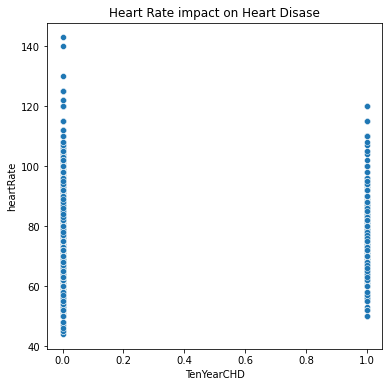

In [23]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x="TenYearCHD",y="heartRate",data=df, palette="RdPu")
plt.title("Heart Rate impact on Heart Disase")


In [24]:

# Importing the required packages for data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve, classification_report
from statsmodels.tools import add_constant
import warnings
warnings.filterwarnings('ignore')


#ensembling
# from mlxtend.classifier import StackingCVClassifier

# Defining the variables X & y
X = df.drop(['TenYearCHD'], axis=1)
X = add_constant(X)
y = df['TenYearCHD']

# Split the preprocessed dataset into the Training and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

# Create a StandardScaler instances
scaler =StandardScaler()

# Scaling & fit the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Checking if the data is equally split (if unbalanced or not)
from collections import Counter
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 1790, 1: 329})

array([[<AxesSubplot:title={'center':'const'}>,
        <AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>,
        <AxesSubplot:title={'center':'totChol'}>],
       [<AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>],
       [<AxesSubplot:title={'center':'glucose'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

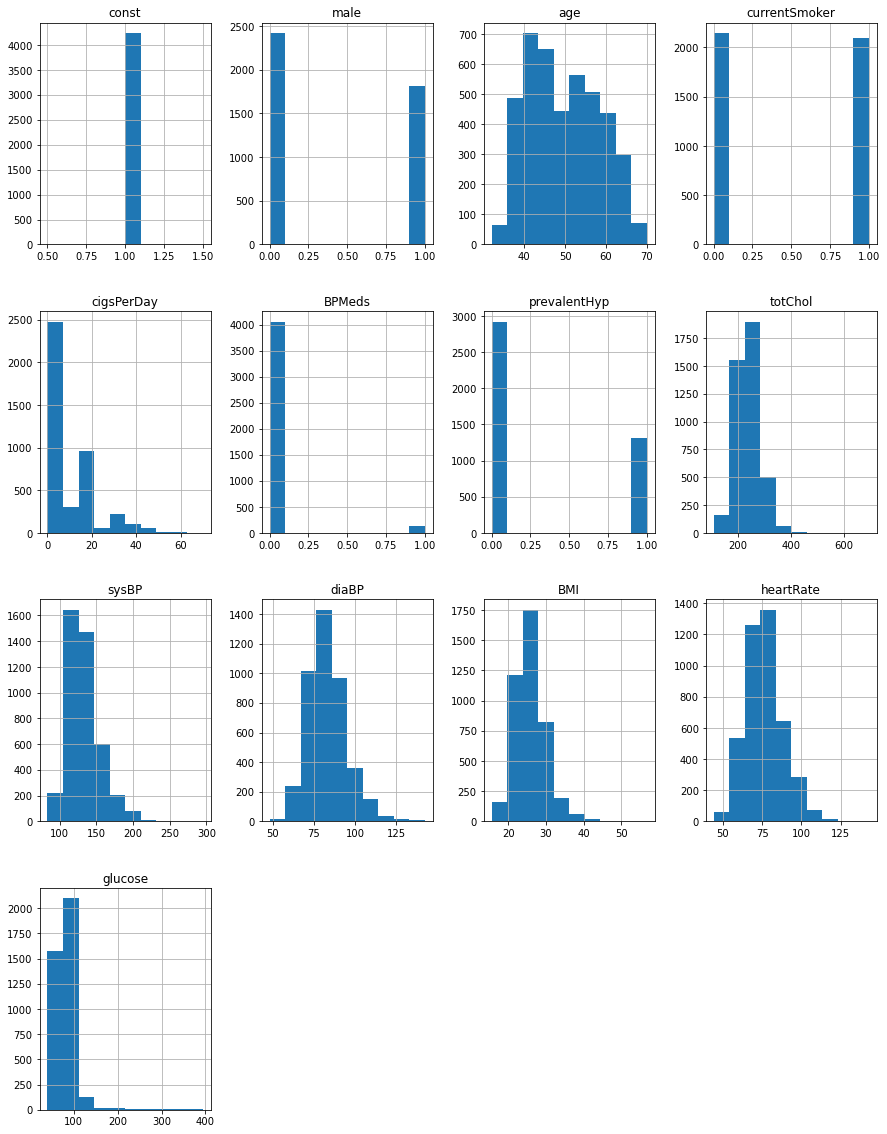

In [26]:
#Graphical representation on the dataset in histograms 
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
pd.DataFrame(X).hist(ax = ax)


In [27]:
#Logistic Regression
#classifier = LogisticRegression(random_state=0)
#classifier.fit(X_train,y_train)
#y_pred = classifier.predict(X_test)

m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

#matrix = confusion_matrix(y_test, y_pred)
#print(matrix)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

#report = classification_report(y_test, y_pred)
#print(report)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').